## 1. Data preparation

### 1.1. RNA-seq

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans
import csv
import gzip
import episcanpy.api as epi

In [2]:
RNA_seq = sc.read_mtx('GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx.gz')

In [3]:
col_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv.gz', mode="rt"), delimiter="\t")]
row_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv.gz', mode="rt"), delimiter="\t")]

In [4]:
RNA_seq = RNA_seq.transpose()
RNA_seq.var.index = col_names
RNA_seq.obs.index = row_names

In [5]:
RNA_df = RNA_seq.to_df()
RNA_df

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610030E20Rik,0610031O16Rik,0610037L13Rik,...,Vmn1r68,Vmn1r82,Vmn2r-ps23,Vmn2r-ps24,Vmn2r-ps45,Vmn2r-ps83,Vmn2r50,Vpreb2,n-R5s32,n-R5s50
09A_CAGCCCCGCCTT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_CGCCTACCATGA,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GATGCGCGGCTA,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GGTCCGAGTCCT,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_TCTCCCGGCACC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09L_TACTAGTTCAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_ATGACGGGCCCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_GAAACACCTCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_AACGGTTTATCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
RNA_seq.obs

""
09A_CAGCCCCGCCTT
09A_CGCCTACCATGA
09A_GATGCGCGGCTA
09A_GGTCCGAGTCCT
09A_TCTCCCGGCACC
...
09L_TACTAGTTCAAG
09L_ATGACGGGCCCC
09L_GAAACACCTCAT
09L_AACGGTTTATCC


In [7]:
RNA_seq.var

""
0610005C13Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
...
Vmn2r-ps83
Vmn2r50
Vpreb2
n-R5s32


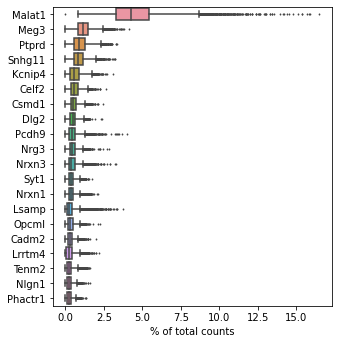

In [8]:
sc.pl.highest_expr_genes(RNA_seq, n_top=20, )

In [9]:
sc.pp.filter_cells(RNA_seq, min_genes=20)

In [10]:
sc.pp.filter_genes(RNA_seq, min_cells=5)

In [11]:
sc.pp.calculate_qc_metrics(RNA_seq, percent_top=None, log1p=False, inplace=True)

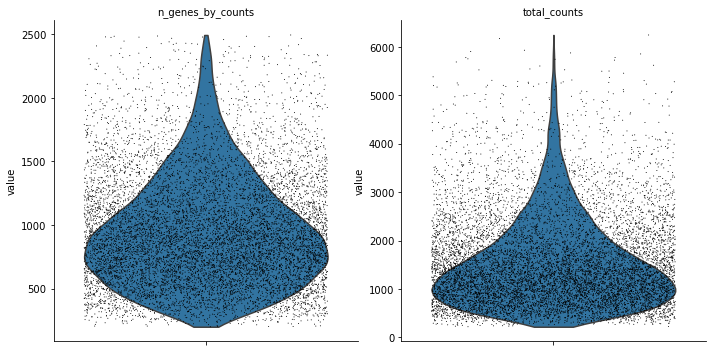

In [12]:
sc.pl.violin(RNA_seq, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

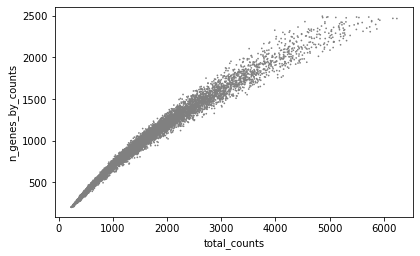

In [13]:
sc.pl.scatter(RNA_seq, x='total_counts', y='n_genes_by_counts')

In [14]:
RNA_seq = RNA_seq[RNA_seq.obs.n_genes_by_counts < 2500, :]

In [15]:
sc.pp.normalize_total(RNA_seq, target_sum=1e4)

In [16]:
sc.pp.log1p(RNA_seq)

In [17]:
sc.pp.highly_variable_genes(RNA_seq, min_mean=0.0125, max_mean=3, min_disp=0.5)

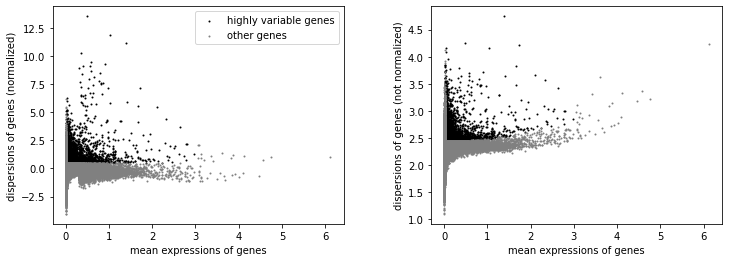

In [18]:
sc.pl.highly_variable_genes(RNA_seq)

In [19]:
RNA_seq = RNA_seq[:, RNA_seq.var.highly_variable]

In [20]:
sc.pp.regress_out(RNA_seq, ['total_counts'])

In [21]:
sc.pp.scale(RNA_seq, max_value=10)

In [22]:
RNA_seq

AnnData object with n_obs × n_vars = 10309 × 3928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

### 1.2. ATAC-seq

In [23]:
ATAC_seq = sc.read_mtx(
    'GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx.gz')

In [24]:
cols_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv.gz', mode="rt"), delimiter="\t")]
rows_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv.gz', mode="rt"), delimiter="\t")]

In [25]:
ATAC_seq.var.index = cols_names
ATAC_seq.obs.index = rows_names
ATAC_seq = ATAC_seq.transpose()
# ATAC_df = ATAC_seq.to_df()
# ATAC_df

In [26]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244544

In [27]:
ATAC_seq.var_names

Index(['chr1:3005833-3005982', 'chr1:3094772-3095489', 'chr1:3119556-3120739',
       'chr1:3121334-3121696', 'chr1:3134637-3135032', 'chr1:3164929-3165186',
       'chr1:3167174-3167517', 'chr1:3181253-3181529', 'chr1:3204775-3205172',
       'chr1:3210899-3211332',
       ...
       'chrY:1286238-1286811', 'chrY:1299405-1299847',
       'chrY:10640917-10641104', 'chrY:90719613-90719806',
       'chrY:90726135-90726362', 'chrY:90732105-90732474',
       'chrY:90740917-90741416', 'chrY:90741519-90742734',
       'chrY:90742824-90743114', 'chrY:90744284-90744731'],
      dtype='object', length=244544)

In [28]:
ATAC_seq1 = ATAC_seq.X.tocsr()

In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation( n_components = 10, n_jobs= -1)
lda_components = lda_model.fit_transform(ATAC_seq1)
lda_components.shape

(10309, 10)

In [30]:
lda_components = pd.DataFrame(lda_components)
lda_components.index = ATAC_seq.obs.index
lda_components = lda_components.rename(columns = {lda_components.columns[0]:'LDA_C1', lda_components.columns[1]:'LDA_C2', lda_components.columns[2]:'LDA_C3', lda_components.columns[3]:'LDA_C4', lda_components.columns[4]:'LDA_C5', lda_components.columns[5]:'LDA_C6', lda_components.columns[6]:'LDA_C7', lda_components.columns[7]:'LDA_C8', lda_components.columns[8]:'LDA_C9', lda_components.columns[9]:'LDA_C10'})      
lda_components.head()

,LDA_C1,LDA_C2,LDA_C3,LDA_C4,LDA_C5,LDA_C6,LDA_C7,LDA_C8,LDA_C9,LDA_C10
09A_GATGCGCGGCTA,0.004970,0.000014,0.237809,0.000014,0.000014,0.000014,0.003996,0.487574,0.140809,0.124784
09A_GCCATGACCCCA,0.007496,0.000014,0.295979,0.000014,0.000014,0.000014,0.000014,0.237177,0.000014,0.459264
09F_TGGACGATTTGT,0.002898,0.000014,0.334065,0.000014,0.000014,0.000014,0.000014,0.144549,0.065597,0.452819
09K_GTCTGCCATTAC,0.000016,0.000016,0.107712,0.009447,0.000016,0.000016,0.000016,0.879586,0.000016,0.003158
09F_GGATGAAGAGGG,0.173102,0.000020,0.414742,0.000020,0.000020,0.000020,0.000020,0.186039,0.000020,0.225994


In [31]:
LDAATAC_seq = sc.AnnData(lda_components)

In [32]:
LDAATAC_seq

AnnData object with n_obs × n_vars = 10309 × 10

## 2. Integration

### 2.1 Use MMD-MA to integrate the data above

In [ ]:
RNA_seq (you can see this part in the other notebook)

AnnData object with n_obs × n_vars = 10309 × 3928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### 2.2 Use SCOT to integrate the data above.

In [33]:
import sys
sys.path.insert(1, '/geode2/home/u060/mmonshiz/Carbonate/SCOT/src')
from scot import SCOT

In [37]:
RNA_seq_npy = RNA_seq[:500].X.toarray()
print(type(RNA_seq_npy))
ATAC_seq_npy = lda_components[:500].to_numpy()
print(type(ATAC_seq_npy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
import gc
gc.collect()

816196

In [41]:
scot_aligner=SCOT(RNA_seq_npy, ATAC_seq_npy)
k= 50 # a hyperparameter of the model, determines the number of neighbors to be used in the kNN graph constructed for cells based on sequencing data correlations
e= 1e-3 # another hyperparameter of the model, determines the coefficient of the entropic regularization term
normalize=True #
aligned_domain1, aligned_domain2= scot_aligner.align(k=k, e=e, normalize=normalize)

It.  |Err         
-------------------
    0|9.703162e-04|
   10|1.191113e-03|
   20|5.464149e-04|
   30|3.569961e-04|
   40|2.343779e-04|
   50|1.986401e-04|
   60|1.733107e-04|
   70|1.232973e-04|
   80|9.165628e-05|
   90|7.683158e-05|
  100|6.688521e-05|
  110|4.666587e-05|
  120|3.210719e-05|
  130|2.158890e-05|
  140|1.366035e-05|
  150|1.247009e-05|
  160|3.127764e-05|
  170|6.742083e-05|
  180|3.152471e-05|
  190|2.418737e-05|
It.  |Err         
-------------------
  200|2.117823e-05|
  210|1.885910e-05|
  220|1.920378e-05|
  230|3.490757e-05|
  240|7.288095e-05|
  250|4.088281e-05|
  260|5.432205e-05|
  270|6.751418e-05|
  280|3.114881e-05|
  290|2.506317e-05|
  300|2.617558e-05|
  310|3.452442e-05|
  320|1.247965e-04|
  330|1.013197e-04|
  340|5.393090e-05|
  350|2.840685e-05|
  360|1.614836e-05|
  370|1.039219e-05|
  380|7.107744e-06|
  390|5.042004e-06|
It.  |Err         
-------------------
  400|3.691635e-06|
  410|2.776421e-06|
  420|2.131269e-06|
  430|1.659819e-06|
  4

In [42]:
import evals

In [43]:
fracs=evals.calc_domainAveraged_FOSCTTM(aligned_domain1, aligned_domain2)
avFOSCTTM= np.mean(fracs) #Then we average FOSCTTMs across all cells to obtain a single measure per alignment

print("Average FOSCTTM score for this alignment with X onto Y is: ", avFOSCTTM)

Average FOSCTTM score for this alignment with X onto Y is:  0.49205410821643286


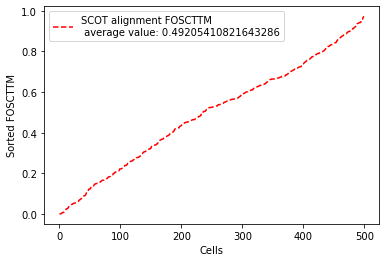

In [44]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

### 2.4

In MMD MA we have to set hyperparameters ourself but in SCOT it has automatic hyperparameter tunning which lead to a better result. MMD MA take more time to run than th SCOT. Both methods are unsupervised allignment method. In general SCOT seems better.

# Ignore this part till the end

## Data preparation

In [49]:
import csv
tsv_file = open("Scere20170205.txt")

read_tsv = csv.reader(tsv_file, delimiter="\t")

In [50]:
i = 0
col_1 = []
col_2 = []
for row in read_tsv:
#   i += 1
#   if i == 3:
#         break
  col_1.append(row[0])
  col_2.append(row[1])

In [51]:
import pandas as pd
for i in range(1, len(col_1)):
    index11 = col_1[i].find('-')
    index12 = col_1[i].find('|')
    col_1[i] = col_1[i][index11+1:index12-1]
    index21 = col_2[i].find('-')
    index22 = col_2[i].find('|')
    col_2[i] = col_2[i][index21+1:index22-1]

df= pd.DataFrame({'source': col_1[1:], 'target': col_2[1:]})
print(df)


      source target
0         25     25
1        343     80
2        551    548
3         18    780
4       1104    671
...      ...    ...
22972   4637   6817
22973   1294   2405
22974   1294   1812
22975   2492    963
22976   2492    695

[22977 rows x 2 columns]


In [52]:
df = pd.crosstab(df.source, df.target)
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)
print (df)

      1000  1001  1002  1003  1004  1008  1009  1010  1011  1012  ...  990  \
1000     0     0     0     0     0     0     0     0     0     0  ...    0   
1001     0     0     0     0     0     0     0     0     0     0  ...    0   
1002     0     0     0     0     0     0     0     0     0     0  ...    0   
1003     0     0     0     0     0     0     0     0     0     0  ...    0   
1004     0     0     0     0     0     0     0     0     0     0  ...    0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
995      0     0     0     0     0     0     0     0     0     0  ...    0   
996      0     0     0     0     0     0     0     0     0     0  ...    0   
997      0     0     0     0     0     0     0     0     0     0  ...    0   
998      0     0     0     0     0     0     0     0     0     0  ...    0   
999      0     0     0     0     0     0     0     0     0     0  ...    0   

      991  992  993  994  995  996  997  998  999  
1000    0  

In [53]:
adjmatrix = df.to_numpy()
print(adjmatrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# !pip install community

In [10]:
# !pip install python-louvain

     |████████████████████████████████| 204 kB 9.5 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9408 sha256=35510a78ed47e64a4b279d9d1ac40c233f469af6cdc120eb1255b35f8ae3d9c0
  Stored in directory: /geode2/home/u060/mmonshiz/Carbonate/.cache/pip/wheels/af/40/91/ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [54]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

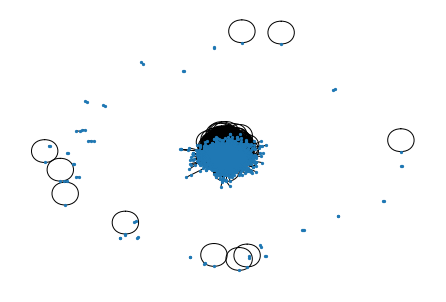

In [55]:
G = nx.from_numpy_matrix(adjmatrix)
nx.draw(G, node_size = 5)

In [56]:
A1 = nx.adjacency_matrix(G)

/tmp/ipykernel_13847/3303181782.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G)


In [57]:
A1 = A1.toarray()

## 4. Graph Partition

### 4.2

In [58]:
# spectral Clustering (Normal cut)->sklearn
# when the affinity matrix is the adjacent matrix perform normal cut
from sklearn.cluster import SpectralClustering

In [59]:
# Clustering using normal cut
sClustering = SpectralClustering(n_clusters = 50, affinity='precomputed', n_init=100)
sClustering.fit(adjmatrix)

print('spectral clustering')
print(sClustering.labels_)

/geode2/home/u060/mmonshiz/Carbonate/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:234: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/geode2/home/u060/mmonshiz/Carbonate/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


spectral clustering
[0 0 0 ... 0 0 0]


In [60]:
groupDict = dict(enumerate(x for x in sClustering.labels_))

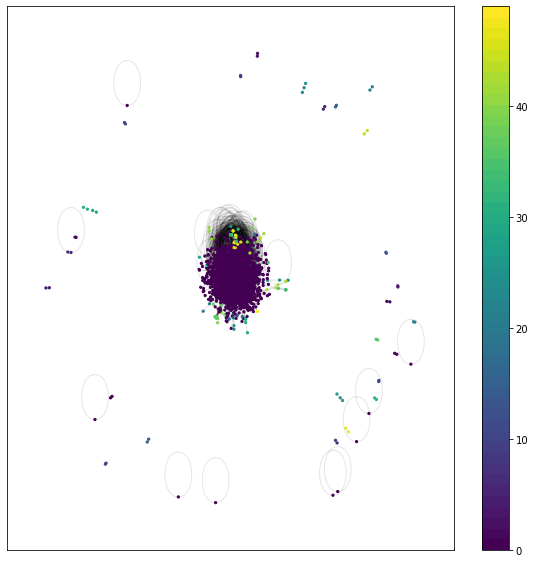

In [61]:
#form the graph
G = nx.from_numpy_matrix(adjmatrix)
# draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(groupDict.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, groupDict.keys(), node_size=5,
                       cmap=cmap, node_color=list(groupDict.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

### 4.3

In [62]:
# performing graph partition using the best modularity value (Louvain algorithm)
partition = community_louvain.best_partition(G)

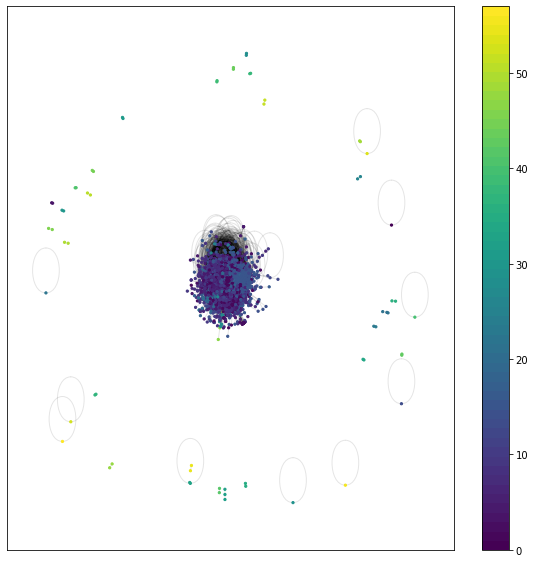

In [63]:
# draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=5,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

## 5. Evaluation

In [27]:
# !pip install goatools

     |████████████████████████████████| 15.1 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 53.0 MB/s eta 0:00:01
  Created wheel for goatools: filename=goatools-1.2.3-py3-none-any.whl size=15764718 sha256=ca348eaf1b85717f706305bf27da74e63a786481742795a5b2e0d7b676d764f7
  Stored in directory: /geode2/home/u060/mmonshiz/Carbonate/.cache/pip/wheels/71/86/4e/369487bc6f25d70cb10af11b55a687f36dcc669d40cf212dbc
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=7e24479d04a638477687a93e037a46500a85c0b7aa364b5dc4ed6837ae07019c
  Stored in directory: /geode2/home/u060/mmonshiz/Carbonate/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built goatools docopt


In [29]:
from goatools.base import download_ncbi_associations
fin_gene2go = download_ncbi_associations()

from goatools.anno.genetogo_reader import Gene2GoReader
objanno_sce = Gene2GoReader(fin_gene2go, taxids=[559292])

  EXISTS: gene2go
HMS:0:00:04.485504  94,654 annotations,  6,420 genes,  6,099 GOs, 1 taxids READ: gene2go 


In [35]:
ns2assoc = objanno_sce.get_ns2assc()
for nspc, id2gos in ns2assoc.items():
    print(id2gos.keys())

dict_keys([850287, 850288, 850289, 850290, 850292, 850293, 850295, 850296, 850297, 850298, 850299, 850300, 850301, 850302, 850303, 850304, 850305, 850306, 850307, 850308, 850309, 850310, 850312, 850313, 850314, 850315, 850317, 850318, 850319, 850320, 850322, 850323, 850324, 850325, 850326, 850327, 850328, 850329, 850330, 850331, 850332, 850333, 850334, 850337, 850338, 850339, 850340, 850341, 850342, 850343, 850344, 850345, 850346, 850347, 850348, 850349, 850351, 850352, 850353, 850354, 850355, 850356, 850358, 850359, 850360, 850361, 850363, 850364, 850365, 850366, 850367, 850368, 850369, 850370, 850372, 850374, 850375, 850376, 850377, 850378, 850379, 850382, 850383, 850384, 850385, 850387, 850388, 850389, 850391, 850392, 850393, 850394, 850395, 850396, 850397, 850398, 850399, 850400, 850401, 850402, 850403, 850405, 850406, 850407, 850408, 850409, 850410, 850411, 850412, 850413, 850414, 850415, 850418, 850419, 850420, 850421, 850422, 850423, 850424, 850425, 850426, 850427, 850429, 85043